In [64]:
# Imports and project paths
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Project paths
PROJECT_ROOT = Path("..").resolve()
DATA_PATH = PROJECT_ROOT / "data" / "raw" / "amazon_sales.csv"

PROJECT_ROOT, DATA_PATH


(PosixPath('/projects/amazon-sales-mlops'),
 PosixPath('/projects/amazon-sales-mlops/data/raw/amazon_sales.csv'))

In [65]:
PROJECT_ROOT,DATA_PATH, DATA_PATH.exists()

(PosixPath('/projects/amazon-sales-mlops'),
 PosixPath('/projects/amazon-sales-mlops/data/raw/amazon_sales.csv'),
 True)

In [66]:
# Load and inspect the data

df = pd.read_csv(DATA_PATH)
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [67]:
print("Shape (rows, columns):", df.shape)
print("\columns:")
print(df.columns.tolist())

Shape (rows, columns): (100000, 20)
\columns:
['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID', 'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus', 'City', 'State', 'Country', 'SellerID']


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_228141/2494268642.py:2: SyntaxWarning: invalid escape sequence '\c'
  print("\columns:")


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [69]:
# Analyzing the missing values
missing_count = df.isna().sum()
missing_count

OrderID          0
OrderDate        0
CustomerID       0
CustomerName     0
ProductID        0
ProductName      0
Category         0
Brand            0
Quantity         0
UnitPrice        0
Discount         0
Tax              0
ShippingCost     0
TotalAmount      0
PaymentMethod    0
OrderStatus      0
City             0
State            0
Country          0
SellerID         0
dtype: int64

#### We have no missing values. 

In [70]:
# Checking the missing ratios 
missing_ratio = df.isna().mean().sort_values(ascending=False)
missing_ratio

OrderID          0.0
OrderDate        0.0
CustomerID       0.0
CustomerName     0.0
ProductID        0.0
ProductName      0.0
Category         0.0
Brand            0.0
Quantity         0.0
UnitPrice        0.0
Discount         0.0
Tax              0.0
ShippingCost     0.0
TotalAmount      0.0
PaymentMethod    0.0
OrderStatus      0.0
City             0.0
State            0.0
Country          0.0
SellerID         0.0
dtype: float64

In [71]:
# Numeric summary 
# I want to understand and analyze the scale and distribution of the numerical variables

numeric_summary = df.describe()
numeric_summary

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


In [72]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")

Duplicates: 0


In [73]:
# Full description of the dataset
full_summary = df.describe(include="all").T
full_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderID,100000,100000,ORD0000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrderDate,100000,1825,2022-04-28,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,100000,43233,CUST037103,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerName,100000,200,Karan Joshi,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductID,100000,50,P00019,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,100000,50,LED Desk Lamp,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,100000,6,Electronics,16853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,100000,10,ReadMore,10204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,100000.0,NaN,NaN,NaN,3.0014,1.413548,1.0,2.0,3.0,4.0,5.0
UnitPrice,100000.0,NaN,NaN,NaN,302.905748,171.840797,5.0,154.19,303.07,451.5,599.99


### Note:
The dataset has several categorical features like country, city, product id, order status etc. Knowing their cardinality is significant for feature engineering.

In [74]:
# Categorical overview
unique_counts = df.nunique().sort_values(ascending=False)
unique_counts

OrderID          100000
TotalAmount       79208
UnitPrice         48433
CustomerID        43233
Tax               23002
SellerID           1999
OrderDate          1825
ShippingCost       1501
CustomerName        200
ProductID            50
ProductName          50
City                 20
State                13
Brand                10
Discount              7
Category              6
PaymentMethod         6
Quantity              5
OrderStatus           5
Country               5
dtype: int64

In [75]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [76]:
df["Country"].value_counts()

Country
United States     70058
India             15051
Canada             5818
United Kingdom     4943
Australia          4130
Name: count, dtype: int64

In [77]:
df["Category"].value_counts()


Category
Electronics          16853
Sports & Outdoors    16804
Books                16752
Home & Kitchen       16610
Toys & Games         16542
Clothing             16439
Name: count, dtype: int64

### Visual analysis

Now, I'd like to analyze the whole dataset visually.

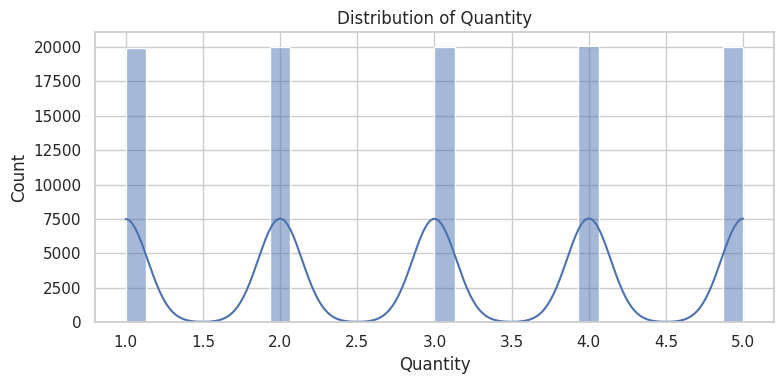

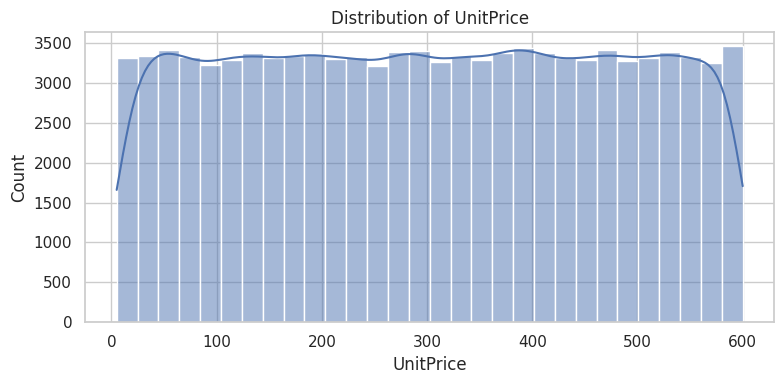

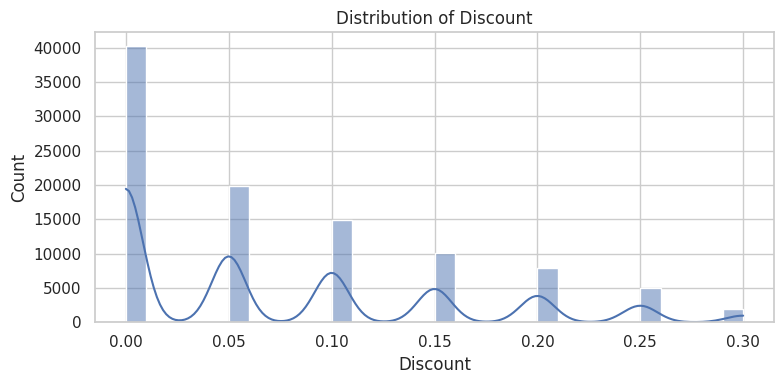

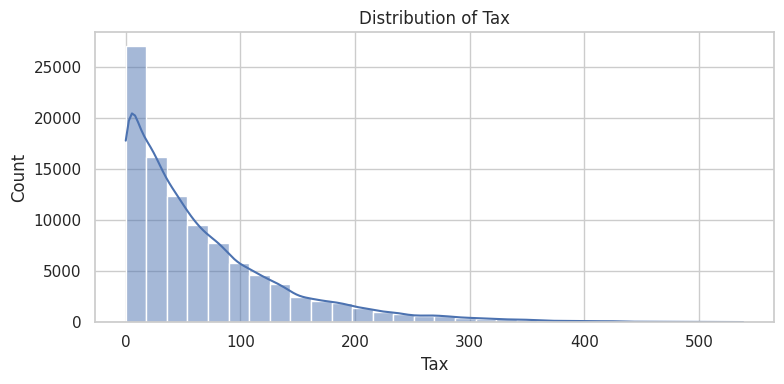

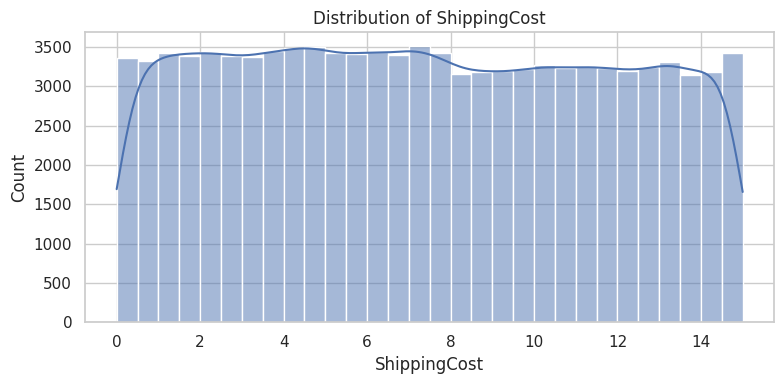

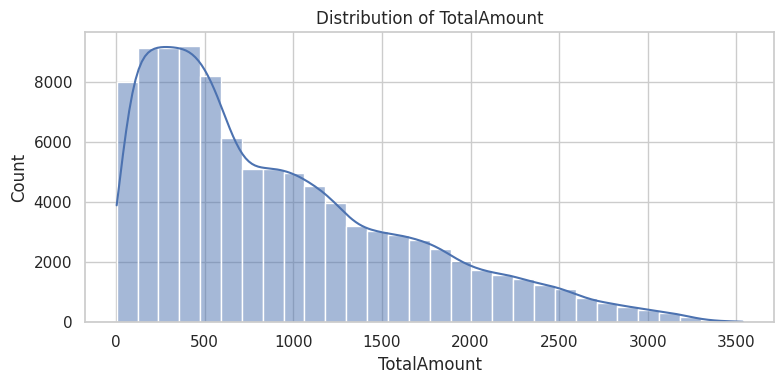

In [78]:
sns.set(style="whitegrid")

numeric_cols = ["Quantity", "UnitPrice", "Discount",
                "Tax", "ShippingCost", "TotalAmount"]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        kde=True
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Outliers and spread 

Now, I will analyze the outliers and spread.

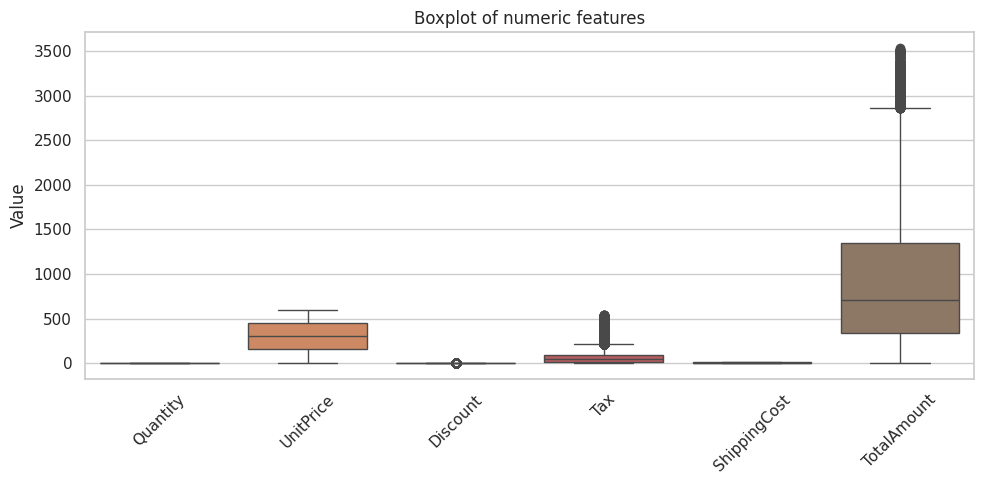

In [79]:
# Boxplot to visualize median, quartiles and potential outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of numeric features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
def plot_categorical_count(column, top_n=None):
    plt.figure(figsize=(8, 4))
    if top_n is None:
        data = df[column].value_counts()
    else:
        data = df[column].value_counts().head(top_n)
    sns.barplot(x=data.index, y=data.values)
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

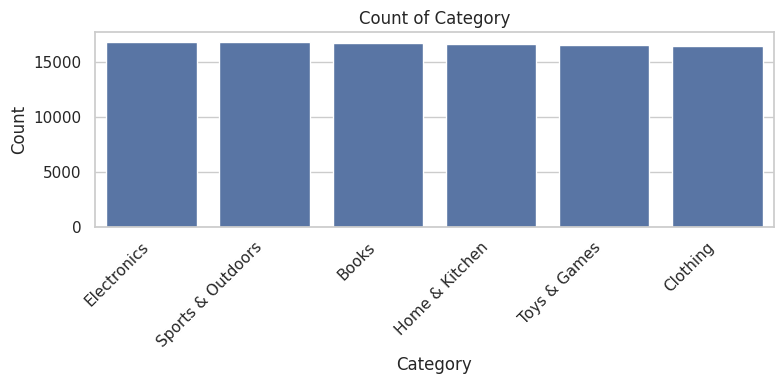

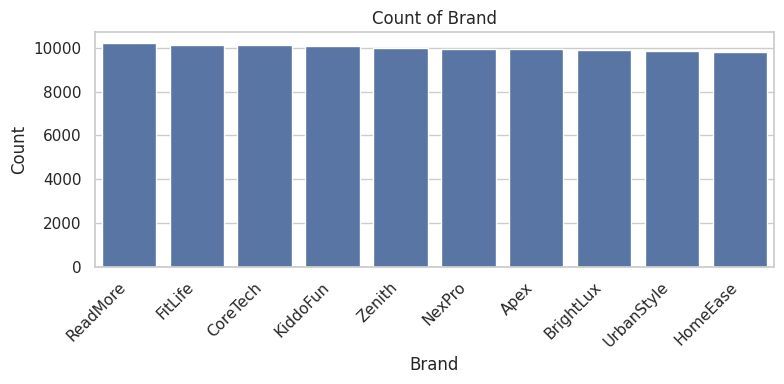

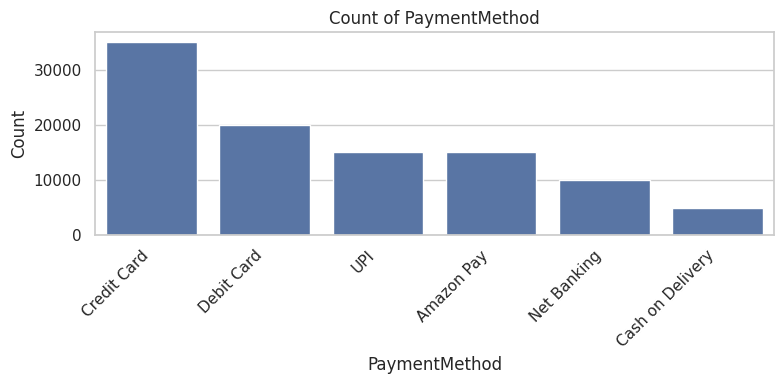

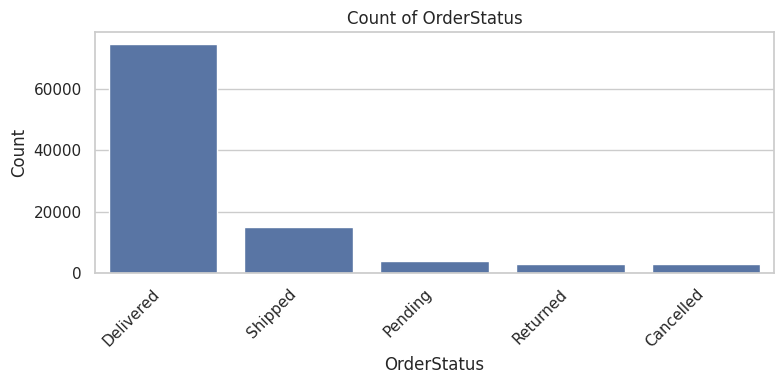

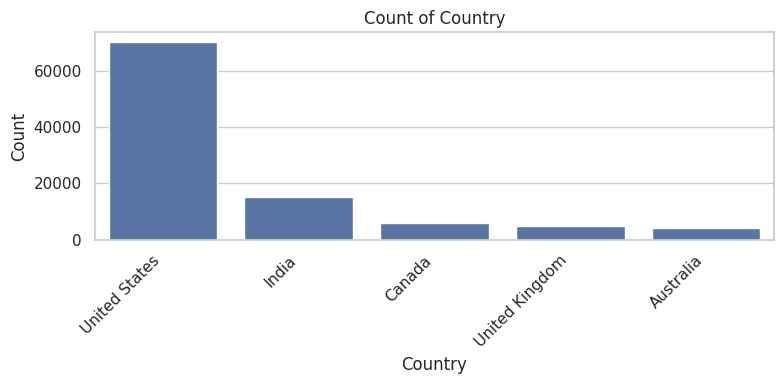

In [81]:
for col in ["Category", "Brand", "PaymentMethod", "OrderStatus", "Country"]:
    plot_categorical_count(col)


### Feature Engineering

In [82]:
df.head(5)

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


I am converting OrderDate to datetime. Because as datetime, pandas can uderstand `calendar logic` and expose .dt attributes (year, month, weekday etc).

In [83]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], format="%Y-%m-%d")

# Creating date-based features
df["OrderYear"] = df["OrderDate"].dt.year
df["OrderMonth"] = df["OrderDate"].dt.month
df["OrderDayOfWeek"] = df["OrderDate"].dt.day_name()

# Visualize to check distribution
df["OrderYear"].value_counts().sort_index()
df["OrderMonth"].value_counts().sort_index()
df["OrderDayOfWeek"].value_counts()

OrderDayOfWeek
Thursday     14460
Tuesday      14416
Saturday     14316
Friday       14309
Wednesday    14225
Monday       14150
Sunday       14124
Name: count, dtype: int64

In [84]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,...,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID,OrderYear,OrderMonth,OrderDayOfWeek
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,2023,1,Tuesday
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,2023,12,Saturday
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,2022,5,Tuesday
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,2023,7,Tuesday
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,2023,2,Saturday


### My Interpretation

- All days have estimately 14k orders, that means the dataset is balanced across weekdays. Actually, this is expected from a synthetic generator trying to distribute orders uniformly. 

- There is no big imbalance like 90% of orders on Monday etc. Including OrderDayOfWeek as a feature won't break anything. 

I implicitly checked the `data generation logic` is sane. 

---

### Preparing dataset 

I will prepare dataset for machine learning pipeline creation. 

1. I will drop the useless features which:

- OrderID
- CustomerID
- CustomerName
- ProductName
- ProductID
- SellerID
- OrderDate

These features are useless because they have no more influence on the target.

2. I will save new dataset (.csv) into `data/processed` folder and reuse it when prepare machine learning pipelines.


In [85]:
# Drop ID / name columns I don't need in the model
cols_to_drop = [
    "OrderID",
    "CustomerID",
    "CustomerName",
    "ProductName",
    "ProductID",
    "SellerID",
    "OrderDate" # I don't need this because I already created date-based features
]

df_processed = df.drop(columns=cols_to_drop)

df_processed.head()

,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,OrderYear,OrderMonth,OrderDayOfWeek
0,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,2023,1,Tuesday
1,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,2023,12,Saturday
2,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,2022,5,Tuesday
3,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,2023,7,Tuesday
4,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,2023,2,Saturday


In [ ]:
# Save processed dataset to data/processed folder
processed_dir = PROJECT_ROOT / "data" / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)

processed_path_csv = processed_dir / "amazon_sales_regression.csv"

df_processed.to_csv(processed_path_csv, index=False)

processed_path_csv, processed_path_csv.exists()

(PosixPath('/projects/amazon-sales-mlops/data/processed/amazon_sales_regression.csv'),
 True)